In [134]:
%matplotlib inline
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [33]:
from scipy import stats
import seaborn as sns


In [5]:
#input data
data = pd.read_csv('AviationDataEnd2016UP.csv', encoding='ISO-8859-1')

In [6]:
#rename column
data.rename(columns={data.columns[3]: "Date" }, inplace=True) 

In [7]:
#add new column of year
data['Year']=data.Date.map(lambda x:x.split('-')[0])

In [8]:
#add new column of month
data['Month']=data.Date.map(lambda x:x.split('-')[1])

In [9]:
#Rename columns
data.rename(columns={data.columns[4]: "Location" }, inplace=True)

In [10]:
data.rename(columns={data.columns[1]: "AccidentType" }, inplace=True)

In [11]:
data.rename(columns={data.columns[23]: "TotalFatalInjuries" }, inplace=True)
data.rename(columns={data.columns[24]: "TotalSeriousInjuries" }, inplace=True)
data.rename(columns={data.columns[25]: "TotalMinorInjuries" }, inplace=True)
data.rename(columns={data.columns[26]: "TotalUninjured" }, inplace=True)
data.rename(columns={data.columns[27]: "WeatherCondition" }, inplace=True)
data.rename(columns={data.columns[28]: "Board" }, inplace=True)
data.rename(columns={data.columns[15]: "Model" }, inplace=True)

In [100]:
data

,Event.Id,AccidentType,Accident.Number,Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,Board,Report.Status,Publication.Date,Year,Month
0,20170103X43747,Accident,WPR17LA046,2017-01-03,"Paradise, MT",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,VMC,CRUISE,Preliminary,05/01/2017,2017,01
1,20161230X55950,Accident,WPR17FA044,2016-12-29,"Dabob, WA",United States,47.823611,-122.790000,NaN,NaN,...,4.0,NaN,NaN,NaN,VMC,NaN,Preliminary,05/01/2017,2016,12
2,20161229X93022,Accident,CEN17LA062,2016-12-27,"Piedmont, MO",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,VMC,LANDING,Preliminary,03/01/2017,2016,12
3,20161227X80237,Accident,CEN17LA061,2016-12-27,"Farmington, MO",United States,37.761111,-90.428611,FAM,FARMINGTON RGNL,...,NaN,NaN,1.0,1.0,VMC,TAKEOFF,Preliminary,29/12/2016,2016,12
4,20161226X80840,Accident,WPR17FA041,2016-12-26,"Fresno, CA",United States,36.844444,-119.870834,E79,Sierra Sky Park,...,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,05/01/2017,2016,12
5,20161227X03229,Accident,ERA17FA073,2016-12-26,"Gatlinburg, TN",United States,35.651944,-83.458333,GKT,GATLINBURG-PIGEON FORGE,...,3.0,NaN,NaN,NaN,IMC,DESCENT,Preliminary,03/01/2017,2016,12
6,20161223X22808,Accident,ERA17FA072,2016-12-23,"Middlebury, VT",United States,43.981389,-73.094444,6B0,MIDDLEBURY STATE,...,1.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,04/01/2017,2016,12
7,20161221X11609,Incident,ENG17WA007,2016-12-21,"Toronto, Canada",Canada,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,224.0,NaN,TAKEOFF,Foreign,NaN,2016,12
8,20161222X21701,Accident,CEN17LA060,2016-12-21,"Millersburg, OH",United States,40.536666,81.955833,10G,Holmes County,...,NaN,NaN,1.0,1.0,VMC,APPROACH,Preliminary,27/12/2016,2016,12
9,20161220X20645,Accident,CEN17LA058,2016-12-18,"Blaine, MN",United States,45.195555,-93.162778,NaN,NaN,...,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,05/01/2017,2016,12


In [102]:
#select columns that will be used in analysis
newdata = data[['Event.Id','AccidentType','Accident.Number','Date','Location','Make','TotalFatalInjuries','TotalSeriousInjuries','TotalMinorInjuries','TotalUninjured','WeatherCondition','Board','Year','Month']]

In [103]:
newdata

,Event.Id,AccidentType,Accident.Number,Date,Location,Make,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,Board,Year,Month
0,20170103X43747,Accident,WPR17LA046,2017-01-03,"Paradise, MT",SOFTEX INVEST LLC,NaN,2.0,NaN,NaN,VMC,CRUISE,2017,01
1,20161230X55950,Accident,WPR17FA044,2016-12-29,"Dabob, WA",CESSNA,4.0,NaN,NaN,NaN,VMC,NaN,2016,12
2,20161229X93022,Accident,CEN17LA062,2016-12-27,"Piedmont, MO",PIPER,NaN,NaN,NaN,1.0,VMC,LANDING,2016,12
3,20161227X80237,Accident,CEN17LA061,2016-12-27,"Farmington, MO",MEAD,NaN,NaN,1.0,1.0,VMC,TAKEOFF,2016,12
4,20161226X80840,Accident,WPR17FA041,2016-12-26,"Fresno, CA",PETRUS DAVID WAYNE,2.0,NaN,NaN,NaN,VMC,TAKEOFF,2016,12
5,20161227X03229,Accident,ERA17FA073,2016-12-26,"Gatlinburg, TN",CESSNA,3.0,NaN,NaN,NaN,IMC,DESCENT,2016,12
6,20161223X22808,Accident,ERA17FA072,2016-12-23,"Middlebury, VT",PIPER,1.0,NaN,NaN,NaN,VMC,TAKEOFF,2016,12
7,20161221X11609,Incident,ENG17WA007,2016-12-21,"Toronto, Canada",BOEING,NaN,NaN,NaN,224.0,NaN,TAKEOFF,2016,12
8,20161222X21701,Accident,CEN17LA060,2016-12-21,"Millersburg, OH",CESSNA,NaN,NaN,1.0,1.0,VMC,APPROACH,2016,12
9,20161220X20645,Accident,CEN17LA058,2016-12-18,"Blaine, MN",BELLANCA,NaN,NaN,NaN,1.0,VMC,NaN,2016,12


In [ ]:
#1. Data Cleaning: 

#  a. missing value:  
# There is no missing value in this data set. But if it has missing value, for the amount that is less than 1000, I would drop these data beacuse I have more than 30000 rows data.
# also the data in this set is not continuous, so I can't use regression to get the missing value.

# b. inappropraite values:
# For Total.Fatal.Injuries, it should not have NaN, it shoulb be 0

# c. bad value
# There is no bad value in data set. If it has, I would use .describe() to find max and min value.If it is, I would delete it.
# If there is duplicate value， I can use .drop_duplicates() to drop it


In [ ]:
# 2. description

In [104]:
newdata.describe()

,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured
count,55984.000000,53742.000000,54833.000000,66949.000000
mean,0.814679,0.317703,0.502581,5.790886
std,6.233700,1.372924,2.781994,29.223016
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,2.000000
max,349.000000,111.000000,380.000000,699.000000


In [13]:
#describe Model
#show how many planes are used a kind of model that have accidents 
data['Model'].value_counts()

152                    2278
172                    1263
172N                   1133
PA-28-140               900
172M                    775
150                     725
172P                    669
150M                    581
PA-18                   573
PA-28-161               558
PA-28-180               554
PA-18-150               549
180                     535
PA-28-181               519
206B                    500
182                     485
PA-38-112               464
G-164A                  459
150L                    450
G-164B                  418
A36                     395
170B                    374
140                     355
172S                    347
182P                    345
PA-32-300               342
PA-24-250               340
PA-28R-200              328
269C                    321
A188B                   314
                       ... 
BH-47G2A                  1
747-SP                    1
KNOWLES-THORP KT-18       1
ASW27 - 18E               1
24W-40              

In [14]:
#describe the model data
data['Model'].value_counts().describe()

count    11330.000000
mean         6.988085
std         40.926383
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       2278.000000
Name: Model, dtype: float64

In [15]:
# ‘Model’ is nominal scale，so I can just count the amount of each column
# For Model, we can know the max amount of plane in accident used 152 model, and 172,172N are the second and third dangrous model.

In [16]:
#Describe "Airport"
#get top 10 airports that have most accident
data.Location.value_counts()[:10]

ANCHORAGE, AK      372
MIAMI, FL          185
CHICAGO, IL        169
ALBUQUERQUE, NM    165
HOUSTON, TX        155
Anchorage, AK      140
FAIRBANKS, AK      138
ORLANDO, FL        114
TUCSON, AZ         107
ENGLEWOOD, CO      107
Name: Location, dtype: int64

In [17]:
#describe location data
data.Location.value_counts().describe()

count    25264.000000
mean         3.135489
std          6.777295
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        372.000000
Name: Location, dtype: float64

In [ ]:
#From the analysis, we can know the airport where most accident happened in is Anchorage airport, and we can know other airports that are more likely to have accident.
#In this way, we can keep doing reasearch about weather those airport are more likely to have accident. 

In [61]:
#Describe Maker
makelist=[]

In [62]:
#get the manufactor companies of top 20 kinds of plane that have most accidents
makelist=data.Make.value_counts()[:20]

In [63]:
makelist

CESSNA         17105
PIPER           9433
Cessna          7742
Piper           4096
BEECH           3133
Beech           1748
BELL            1579
BOEING          1372
GRUMMAN          907
Bell             888
Boeing           781
MOONEY           765
BELLANCA         697
HUGHES           581
Robinson         527
ROBINSON         478
Mooney           444
SCHWEIZER        437
AERONCA          405
Air Tractor      364
Name: Make, dtype: int64

In [98]:
data.Make.value_counts().describe()

count     7475.000000
mean        10.595853
std        253.872745
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      17105.000000
Name: Make, dtype: float64

In [122]:
#We can know the planes made by Cessna are most likely to have accidents, and other manufactors whose plane are easy to have accidents.

In [18]:
#Describe Weather condition
data.WeatherCondition.value_counts()

VMC    70507
IMC     5660
UNK      969
Name: WeatherCondition, dtype: int64

In [19]:
data.WeatherCondition.value_counts().describe()

count        3.000000
mean     25712.000000
std      38864.448909
min        969.000000
25%       3314.500000
50%       5660.000000
75%      38083.500000
max      70507.000000
Name: WeatherCondition, dtype: float64

In [ ]:
# We can know most accident happened in VMC

In [20]:
#Analysis the board condition of an accident
#Get most conditions that had accidents
data.Board.value_counts()

LANDING        19209
TAKEOFF        15284
CRUISE         10749
MANEUVERING     9818
APPROACH        7720
TAXI            2322
CLIMB           2279
DESCENT         2202
GO-AROUND       1608
STANDING        1219
UNKNOWN          672
OTHER            157
Name: Board, dtype: int64

In [ ]:
# We can know in 'Landing','Take off' and 'Cruise' conditons are most likely to have accident

In [21]:
data.Board.value_counts().describe()

count       12.000000
mean      6103.250000
std       6375.415297
min        157.000000
25%       1510.750000
50%       2300.500000
75%      10050.750000
max      19209.000000
Name: Board, dtype: float64

In [ ]:
#Describe Total fatal injuries, serious injuries , minor injuries and uninjured conditions in accidents.

In [145]:
newdata.corr()

,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured
TotalFatalInjuries,1.000000,0.265374,0.094239,-0.010301
TotalSeriousInjuries,0.265374,1.000000,0.463262,0.061096
TotalMinorInjuries,0.094239,0.463262,1.000000,0.204987
TotalUninjured,-0.010301,0.061096,0.204987,1.000000


In [ ]:
#There is no aparrently related between those 4 injuries because the correlated coefficient are too small.

In [22]:
#get total fatal injuries, serious injuries , minor injuries and uninjured conditons' amount of every year
data.groupby('Year')[['TotalFatalInjuries','TotalSeriousInjuries','TotalMinorInjuries','TotalUninjured']].sum().sort_values(by = 'TotalFatalInjuries',ascending = False)

,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured
Year,,,,
1996,2533.0,532.0,729.0,12041.0
2000,1765.0,501.0,1256.0,12869.0
2001,1709.0,478.0,612.0,9189.0
2005,1689.0,426.0,620.0,12946.0
1985,1648.0,612.0,1108.0,11292.0
1982,1585.0,727.0,998.0,8314.0
1989,1532.0,518.0,1029.0,12221.0
2006,1489.0,420.0,473.0,10607.0
2014,1436.0,319.0,470.0,10142.0


In [ ]:
#get 4 condition injuries from 1982-2017

In [23]:
datayear=data.groupby('Year')[['TotalFatalInjuries','TotalSeriousInjuries','TotalMinorInjuries','TotalUninjured']].sum()

In [24]:
#describe the sum number of for injuries of each year 
data.groupby('Year')[['TotalFatalInjuries','TotalSeriousInjuries','TotalMinorInjuries','TotalUninjured']].sum().describe()

,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured
count,41.000000,41.000000,39.000000,39.000000
mean,1112.414634,416.439024,706.615385,9940.871795
std,554.469565,202.521239,329.355560,4122.920536
min,1.000000,0.000000,0.000000,0.000000
25%,978.000000,357.000000,516.000000,8908.000000
50%,1229.000000,478.000000,731.000000,10807.000000
75%,1382.000000,532.000000,953.000000,12358.000000
max,2533.000000,727.000000,1256.000000,16021.000000


In [25]:
datayear

,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured
Year,,,,
1948,2.0,0.0,0.0,0.0
1962,4.0,0.0,0.0,0.0
1974,3.0,NaN,NaN,NaN
1977,2.0,0.0,0.0,0.0
1979,1.0,2.0,NaN,NaN
1981,4.0,0.0,0.0,0.0
1982,1585.0,727.0,998.0,8314.0
1983,1273.0,673.0,1048.0,15106.0
1984,1229.0,697.0,1047.0,12495.0


In [26]:
#just analysis those years that have fatal injuries more than 100
datayearmain=datayear[datayear.TotalFatalInjuries>100]

In [72]:
#analysis fatal injuries
datafi=datayearmain[['TotalFatalInjuries']]

In [73]:
datafi

,TotalFatalInjuries
Year,
1982,1585.0
1983,1273.0
1984,1229.0
1985,1648.0
1986,1180.0
1987,1237.0
1988,1195.0
1989,1532.0
1990,999.0


In [27]:
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
import numpy as np

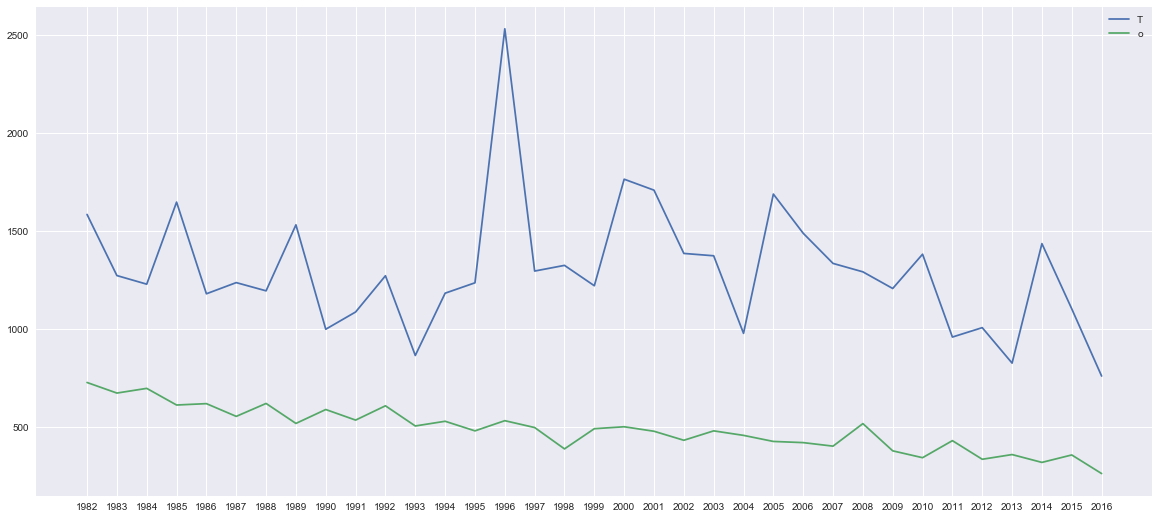

In [144]:
#get line chart of fatal and serious injuries from 1982 to 2016
y = datayearmain['TotalFatalInjuries']
z = datayearmain['TotalSeriousInjuries']

x = range(0,len(y))
plt.figure(figsize=(20, 9))
plt.plot(x,y,z,'')  
plt.legend('TotalFatalInjuries')
plt.show()

In [ ]:
#From the chart, we can know the trend of 2 kinds of injuries. We can know between 1995-1997, there are most TotalFatalInjuries, 
# and we can know both FatalInjuries and SeriousInjuries decline.

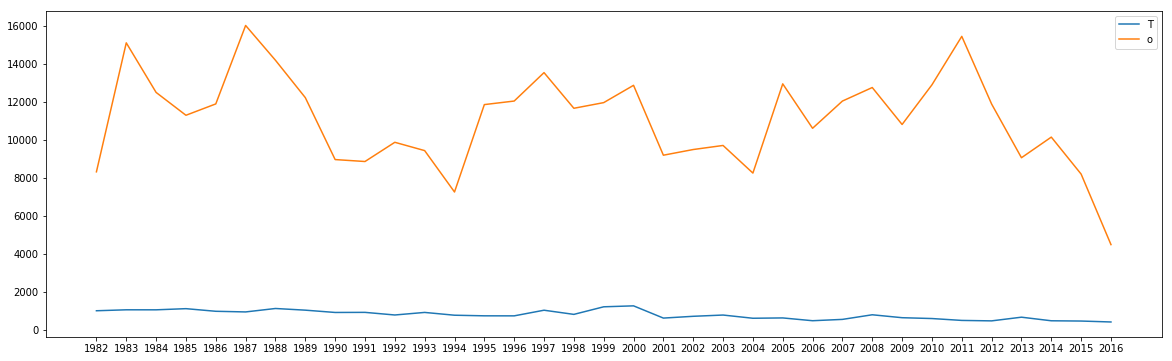

In [29]:
a = datayearmain['TotalMinorInjuries']
b = datayearmain['TotalUninjured']
x = range(0,len(y))
plt.figure(figsize=(20, 6))
plt.plot(x,a,b,'')  
plt.legend('TotalFatalInjuries')
plt.show()

In [ ]:
#From the chart, we can know the trend of 2 kinds of injuries. We can know between 1995-1997, MinorInjuries decline lightly,
# and Uninjured amount have no apparently change.

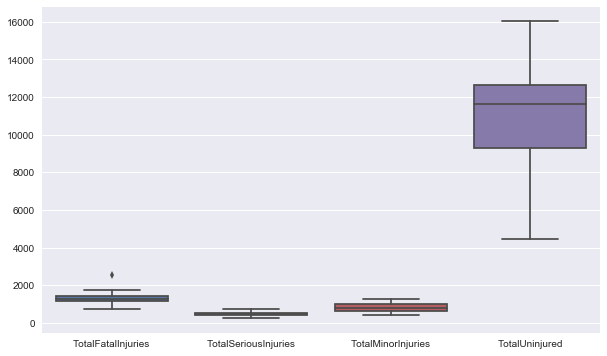

In [115]:
#make box chart of 4 injuries
sns.boxplot(data=datayearmain)

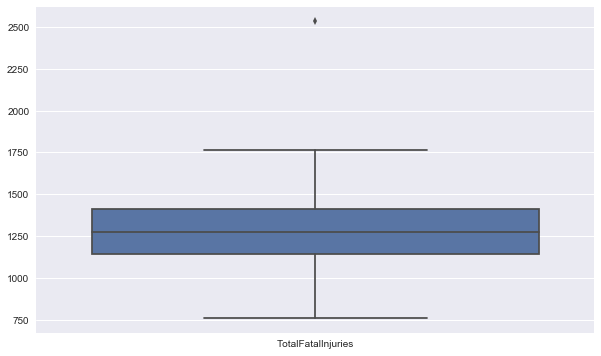

In [129]:

sns.boxplot(data=datayearmain[["TotalFatalInjuries"]])"

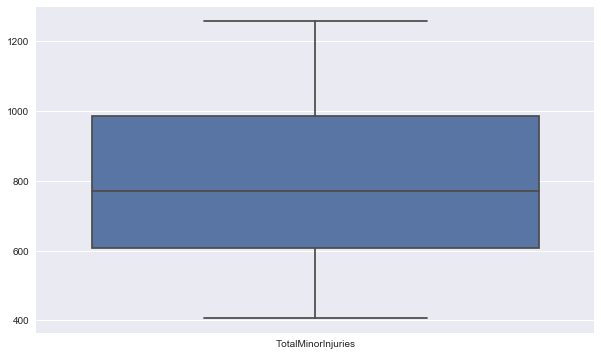

In [131]:
sns.boxplot(data=datayearmain[["TotalMinorInjuries"]])

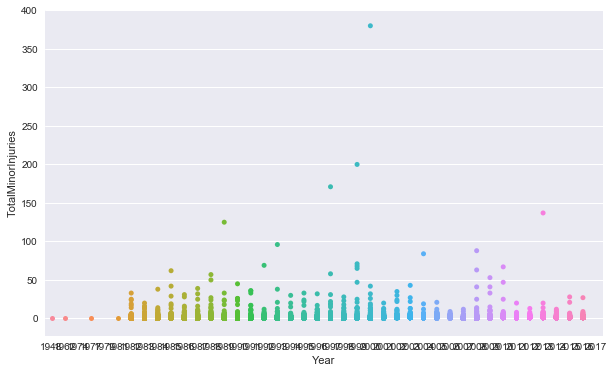

In [121]:
sns.stripplot(x="Year", y="TotalMinorInjuries", data=data)
fig.set_size_inches(200,100) 

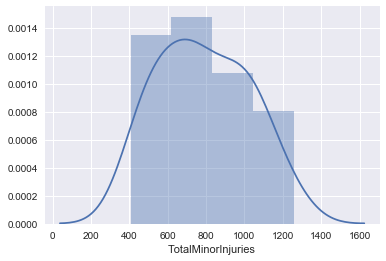

In [111]:
sns.distplot(datayearmain['TotalMinorInjuries'])
sns.set(rc={'figure.figsize':(10,6)})

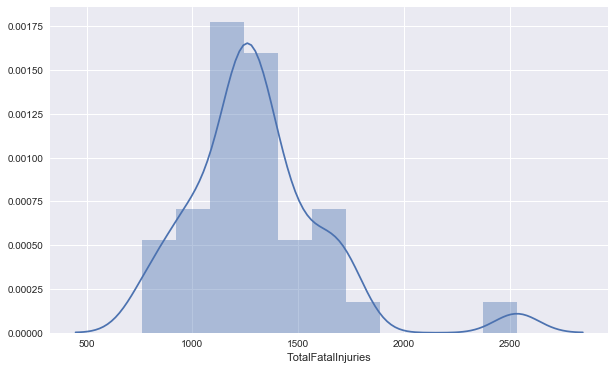

In [117]:
sns.distplot(datayearmain['TotalFatalInjuries'])
